Hyrdogenic SWE for s-states

$-\frac{1}{r}\frac{d^2}{dr^2}\left(r\psi\right)=\frac{2m}{\hbar^2}\left(E+\frac{e^2}{4\pi\epsilon_0r}\right)\psi$

Define: $Ry=\frac{me^4}{8h^2\epsilon_0^2}$

and $a_0=\frac{4\pi\epsilon_0\hbar^2}{me^2}$

and define $\epsilon$ and $\rho$  by $E=Ry \epsilon$, and $r= a_0 \rho$

In units of $Ry$ and $a_0$

SWE becomes: $\frac{d^2}{d\rho^2}\left(\rho\psi\right)=-\left(\epsilon+\frac{2}{\rho}\right)\rho\psi$

(see Feynman https://www.feynmanlectures.caltech.edu/III_19.html )


This form of the SWE can be easily modified to include the states with $l\ne 0$

Solve lowest few eigenstates using Verlet algorithm

Useful site: http://sites.science.oregonstate.edu/~roundyd/COURSES/ph365x/366.html

Puls empirical potential:

$V(r)=-\frac{1}{r}\left(1-2e^{(-2r/a_e)}\left(1+\frac{r}{a_e}\right)\right)$


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


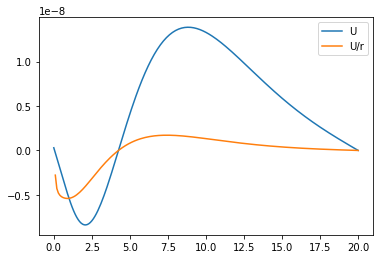

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def v(x):   #hydrogenic potential
    return -1/x

def vpuls(x):   #puls potential
    a0=1
    return -1/x*(1-2*np.exp(-2*x/a0)*(1+x/a0))

Nmax=201
Rmax=20  # radius in Bohr radii
Rinc=Rmax/(Nmax-1)
#print(Rinc)
R=np.linspace(0,Rmax,Nmax)
#print(R)
U=np.empty([Nmax])    # wave function product r*R(r)
U[Nmax-1]=0           #initial values at large r
U[Nmax-2]=1e-10
#print('U',type(U),len(U))
#print('R',type(R),len(R))
#print(R[Nmax-1])

l=1
#solve wavefunctions r*R using Verlet method
for E in [-.155]: 
    for i in range(Nmax-1,1,-1):
        #print(R[i],v(R[i]))
        U[i-2]=2*U[i-1]-U[i]+Rinc**2*(-E+2*v(R[i-1]+l*(l+1)/R[i-1]**2))*U[i-1]
        #Franchini code: u(i-1)=2*u(i)-u(i+1)+h**2*(-2*e+2*v(i)+l*(l+1)/x(i)**2)*u(i)
    #plt.yscale('log')
    plt.plot(R,U,label='U')
    plt.plot(R,U/R,label='U/r')
    plt.legend()